# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:

 Metode Clustering Algoritma adalah mengelompokkan beberapa data ke dalam kelompok yang menjelaskan data dalam satu kelompok memiliki karakteristik yang sama dan memiliki karakteristik yang berbeda dengan data yang ada di kelompok lain. Cluster Sampling adalah teknik pengambilan sampel di mana unit-unit populasi dipilih secara acak dari kelompok yang sudah ada yang disebut ‘cluster, nah Clustering atau klasterisasi adalah salah satu masalah yang menggunakan teknik unsupervised learning.



---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [2]:
df.isnull().sum()


ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          4
dtype: int64

In [3]:
#code here

#handling missing value
df = df.fillna(method='ffill')

df.isnull().sum()



ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64

In [4]:
df.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.61200,64.736000,50.244000
std,72.312977,14.21145,25.112324,28.455286
min,1.000000,18.00000,15.000000,3.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,35.00000,70.000000,50.000000
75%,187.750000,48.00000,78.750000,74.000000
max,250.000000,120.00000,137.000000,150.000000


In [5]:
# Handling Outliers

def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper_bound, lower_bound = outliers(df, "Umur")
df_outliers_removed = df[(df['Umur'] > lower_bound) & (df['Umur'] < upper_bound)]

upper_bound, lower_bound = outliers(df_outliers_removed, "Skor Belanja (1-100)")
df_outliers_removed = df_outliers_removed[(df_outliers_removed['Skor Belanja (1-100)'] > lower_bound) & (df_outliers_removed['Skor Belanja (1-100)'] < upper_bound)]

df_outliers_removed.describe()


,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,248.000000,248.000000,248.000000,248.000000
mean,125.435484,38.298387,64.778226,49.983871
std,71.840719,13.290269,24.970169,27.764622
min,1.000000,18.000000,15.000000,3.000000
25%,63.750000,29.000000,47.000000,27.000000
50%,125.500000,35.000000,70.000000,50.000000
75%,187.250000,48.000000,78.250000,74.000000
max,249.000000,70.000000,137.000000,99.000000


In [6]:
# Rescaling data dengan StandardScaler

scaler = StandardScaler()

df_outliers_removed[['Umur', 'Skor Belanja (1-100)']] = scaler.fit_transform(df_outliers_removed[['Umur', 'Skor Belanja (1-100)']])

df_outliers_removed.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,248.000000,2.480000e+02,248.000000,2.480000e+02
mean,125.435484,1.416877e-16,64.778226,-1.790682e-17
std,71.840719,1.002022e+00,24.970169,1.002022e+00
min,1.000000,-1.530401e+00,15.000000,-1.695643e+00
25%,63.750000,-7.010536e-01,47.000000,-8.294855e-01
50%,125.500000,-2.486825e-01,70.000000,5.820951e-04
75%,187.250000,7.314549e-01,78.250000,8.667395e-01
max,249.000000,2.390149e+00,137.000000,1.768987e+00


In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(df_outliers_removed[['Umur', 'Skor Belanja (1-100)']])


# kmeans


# plt.scatter(kmeans)
# plt.show()

df_new = df_outliers_removed[['Umur', 'Skor Belanja (1-100)']]

df_new.shape

kmeans = KMeans(n_clusters=2)

label = kmeans.fit_predict(df_new)

print(label)

[0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1
 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0
 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


In [8]:
# df_new['cluster'] = label

x = df_new.values

x

array([[-1.45500539e+00, -3.96406732e-01],
       [-1.30421503e+00,  1.11936879e+00],
       [-1.37961021e+00, -1.58737321e+00],
       [-1.15342467e+00,  9.75009217e-01],
       [-5.50263218e-01, -3.60316839e-01],
       [-1.22881985e+00,  9.38919323e-01],
       [-2.48682493e-01, -1.58737321e+00],
       [-1.15342467e+00,  1.58853740e+00],
       [ 1.93777776e+00, -1.69564289e+00],
       [-6.25658399e-01,  7.94559750e-01],
       [ 2.16396331e+00, -1.29865407e+00],
       [-2.48682493e-01,  1.76898687e+00],
       [ 1.48540668e+00, -1.26256417e+00],
       [-1.07802949e+00,  9.75009217e-01],
       [-9.78921305e-02, -1.33474396e+00],
       [-1.22881985e+00,  1.04718900e+00],
       [-1.37961021e+00,  5.78020389e-01],
       [ 1.03303559e+00, -7.57305666e-01],
       [-2.48682493e-01,  1.73289698e+00],
       [-2.48682493e-01, -5.40766306e-01],
       [-1.00263431e+00,  8.30649643e-01],
       [ 5.80664501e-01, -1.62346311e+00],
       [-5.50263218e-01,  8.30649643e-01],
       [ 1.

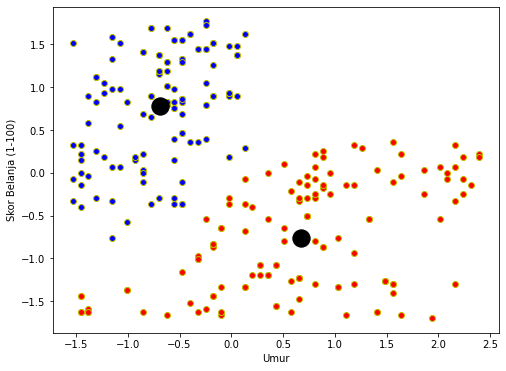

In [17]:

plt.figure(figsize=(8,6))
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')

plt.scatter(x[label==0, 0], x[label==0, 1], c='blue', label ='Cluster 1', edgecolors='y')
plt.scatter(x[label==1, 0], x[label==1, 1], c='red', label ='Cluster 2',edgecolors='y')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label = 'Centroids')

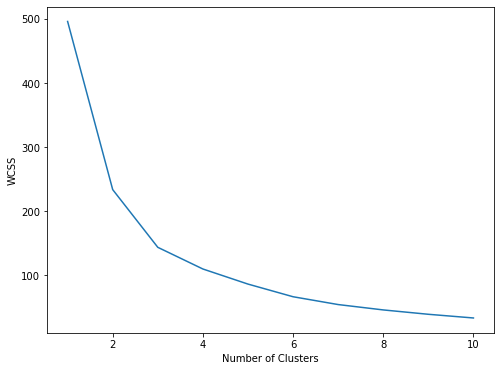

In [21]:
sse = []
k_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k).fit(x)
    centroids = kmeans.cluster_centers_
    prediksi = kmeans.predict(x)
    nilai_sse = 0
    
    for i in range(len(x)):
        titik_pusat = centroids[prediksi[i]]
        nilai_sse += (x[i, 0] - titik_pusat[0]) ** 2 + (x[i, 1] - titik_pusat[1]) ** 2
    
    sse.append(nilai_sse)
    k_list.append(k)


plt.figure(figsize=(8,6))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.plot(k_list, sse)
plt.show()

In [22]:
kmeans = KMeans(n_clusters=3)

label = kmeans.fit_predict(df_new)

print(label)

[0 2 0 2 0 2 0 2 1 2 1 2 1 2 0 2 2 1 2 0 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 0 2
 0 2 1 2 1 2 1 2 1 0 0 0 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 0 1 1 1 1 1
 2 1 0 2 1 1 2 1 1 2 1 1 2 2 1 1 0 1 0 0 2 1 2 1 2 0 1 1 2 1 0 1 1 1 1 1 2
 0 0 2 2 1 1 1 1 2 0 2 2 0 2 0 2 1 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 1 2 0
 2 0 2 0 2 1 2 0 2 0 2 1 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 1 0 1 2 0 2 1 2 0 2
 1 2 0 2 0 2 0 2 1 2 1 2 0 2 2 0 2 0 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 1 2
 0 2 0 2 1 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 1 2 1 2 0 2]


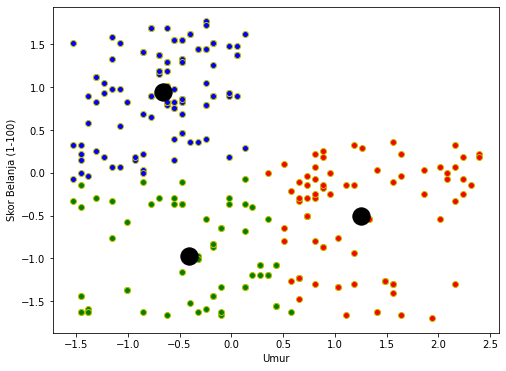

In [24]:
plt.figure(figsize=(8,6))
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')

plt.scatter(x[label==0, 0], x[label==0, 1], c='green', label ='Cluster 1', edgecolors='y')
plt.scatter(x[label==1, 0], x[label==1, 1], c='red', label ='Cluster 2',edgecolors='y')
plt.scatter(x[label==2, 0], x[label==2, 1], c='blue', label ='Cluster 3',edgecolors='y')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label = 'Centroids')

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:

```
Dari hasil clustering diatas didapat bahwa Cluster biru dimana pelanggan dengan usia muda cenderung memiliki skor belanja yang tinggi.
```